# Machine Learning in Business - Course Project

**Project description**

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.


**Project instructions**
- Download and prepare the data. Explain the procedure.

Train and test the model for each region:
- 2.1. Split the data into a training set and validation set at a ratio of 75:25.
- 2.2. Train the model and make predictions for the validation set.
- 2.3. Save the predictions and correct answers for the validation set.
- 2.4. Print the average volume of predicted reserves and model RMSE.
- 2.5. Analyze the results.

Prepare for profit calculation:
- 3.1. Store all key values for calculations in separate variables.
- 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
- 3.3. Provide the findings about the preparation for profit calculation step.

Write a function to calculate profit from a set of selected oil wells and model predictions:
- 4.1. Pick the wells with the highest values of predictions.
- 4.2. Summarize the target volume of reserves in accordance with these predictions
- 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

Calculate risks and profit for each region:
- 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.


**Data description**

Geological exploration data for the three regions are stored in files:
- geo_data_0.csv
- geo_data_1.csv
- geo_data_2.csv

- id — unique oil well identifier
- f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- product — volume of reserves in the oil well (thousand barrels).


**Conditions:**
- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue. The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
- The data is synthetic: contract details and well characteristics are not disclosed.


**Project evaluation**
- How did you prepare the data for training?
- Have you followed all the steps of the instructions?
- Have you taken into account all the business conditions?
- What are your findings about the task study?
- Have you applied the Bootstrapping technique correctly?
- Have you suggested the best region for well development? Is the choice justified?
- Did you avoid code duplication?
- Have you kept to the project structure and kept the code neat?

In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st

# Preprocessing modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluation modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# The constant model should be picked in the manner that allows you to obtain the lowest possible MAE metric value. We need to find the value a, at which the minimum is reached:
# The minimum is reached when a is equal to the target median.

In [2]:
# Load data
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

### EDA

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


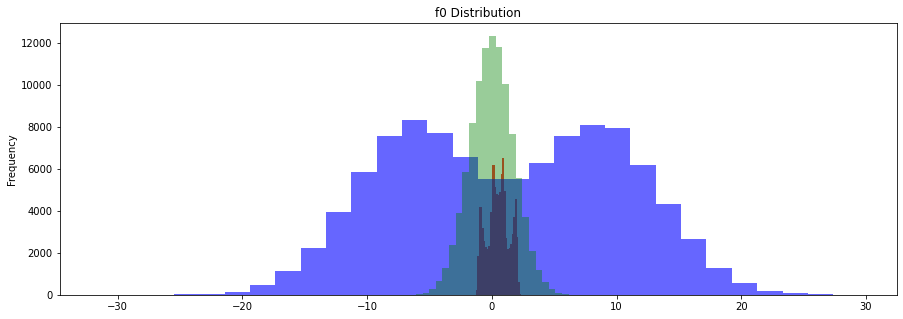

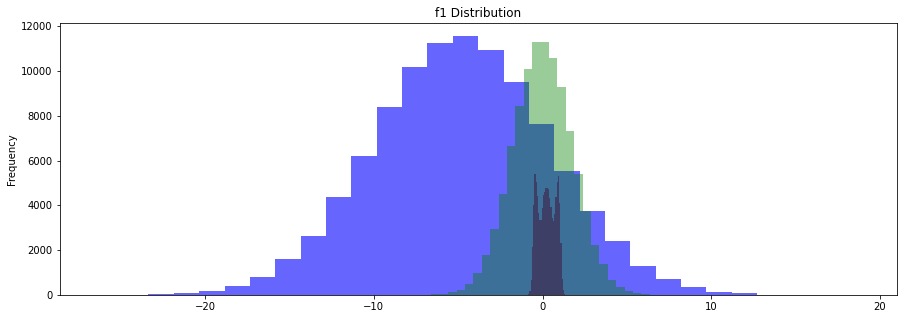

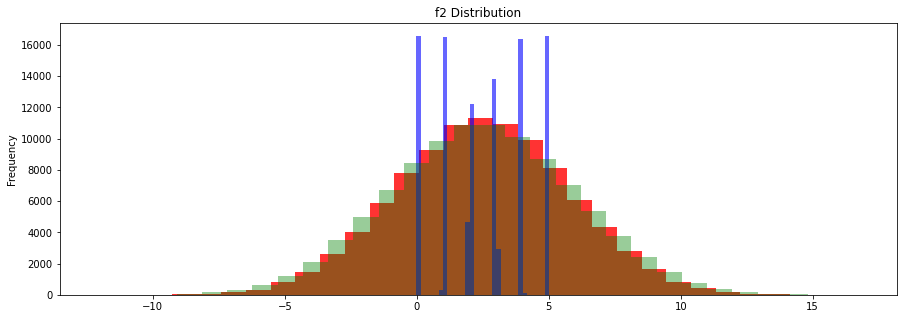

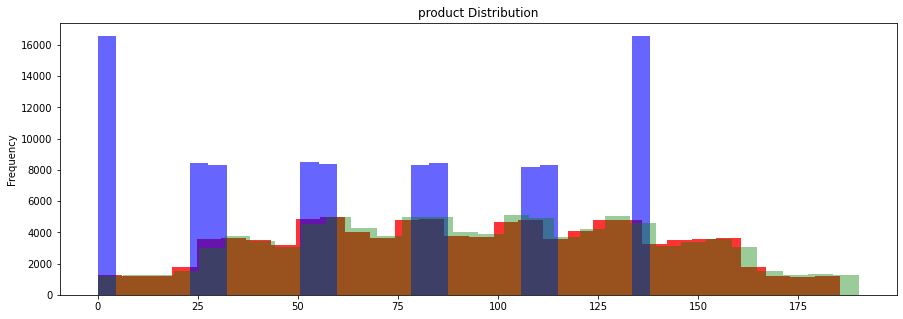

In [9]:
# Plot the distribution of features and product across the 3 regions: 
#     Looks like they all have incredibly different distributionsb

items = df0.drop('id', axis=1).columns.tolist()

for i in items:
    df0[i].plot(kind='hist', color='r', alpha=0.8, bins=30, figsize=[15,5])
    df1[i].plot(kind='hist', color='b', alpha=0.6, bins=30, figsize=[15,5])
    df2[i].plot(kind='hist', color='g', alpha=0.4, bins=30, figsize=[15,5])
    plt.title(f'{i} Distribution')
    plt.show()

**EDA Observations:**
- Looks like the data doesn't have nulls and is in the right format
- The features (f1-3) and target (product) columns are correctly numeric in float format
- The distributions of the columns vary for each region, as can be seen in the charts and describe tables
    - Region 0 (red) and 2 (green) have tighter distributions for f1 and f2 versus Region 1 (blue)
    - For f2, region 0 and 2 are nearly the same but region 1 is very different
    - Likewise for product, regions 0 and 2 are similar and region 1 is different 
    - Needless to say, region 1 is visibly unique, so may likely be the best or worst region

### Model Training

Train and test the model for each region:
- 2.1. Split the data into a training set and validation set at a ratio of 75:25.
- 2.2. Train the model and make predictions for the validation set.
- 2.3. Save the predictions and correct answers for the validation set.
- 2.4. Print the average volume of predicted reserves and model RMSE.
- 2.5. Analyze the results.

In [10]:
# Splitting the data here into training, validation and test sets, with a 75:25 ratio for training:validation

random_state=123

def train_valid_test_split(df):
    X = df.drop(['id', 'product'], axis=1)
    y = df['product']
    X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=random_state)
    X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)
    return X, y, X_train, y_train, X_valid, y_valid, X_test, y_test

In [11]:
# Setting the variables for each region

X0, y0, X0_train, y0_train, X0_valid, y0_valid, X0_test, y0_test = train_valid_test_split(df0)
X1, y1, X1_train, y1_train, X1_valid, y1_valid, X1_test, y1_test = train_valid_test_split(df1)
X2, y2, X2_train, y2_train, X2_valid, y2_valid, X2_test, y2_test = train_valid_test_split(df2)

In [12]:
# Function to gather result metrics

def average_comp(target):
    mean_prediction = pd.Series(target.mean(), index=target.index)
    mean_mse = mean_squared_error(target, mean_prediction)
    mean_rmse = mean_mse**0.5
    return mean_prediction, mean_mse, mean_rmse

In [13]:
# Function to print the result metrics

def print_results(model_rmse, mean_rmse, model_mse, mean_mse):
    print('Linear Regression RMSE:', model_rmse)
    print('Target Average RMSE:', mean_rmse)
    print('RMSE Ratio:', model_rmse / mean_rmse)
    print()
    print('Linear Regression MSE:', model_mse)
    print('Target Average MSE:', mean_mse)
    print('MSE Ratio:', model_mse / mean_mse)

#### Linear Regression

In [14]:
# For region 0

model0 = LinearRegression()
model0.fit(X0_train, y0_train)

model0_predictions = model0.predict(X0_valid)
model0_mse = mean_squared_error(y0_valid, model0_predictions)
model0_rmse = model0_mse**0.5

mean0_prediction, mean0_mse, mean0_rmse = average_comp(y0)
print_results(model0_rmse, mean0_rmse, model0_mse, mean0_mse)
print()
print('Average Predicted Reserves:', model0_predictions.mean())

Linear Regression RMSE: 37.71837356606692
Target Average RMSE: 44.2884696928441
RMSE Ratio: 0.8516522207169704

Linear Regression MSE: 1422.675704469376
Target Average MSE: 1961.4685477339704
MSE Ratio: 0.7253115050521474

Average Predicted Reserves: 92.38669193122716


In [15]:
# For region 1

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

model1_predictions = model1.predict(X1_valid)
model1_mse = mean_squared_error(y1_valid, model1_predictions)
model1_rmse = model1_mse**0.5

mean1_prediction, mean1_mse, mean1_rmse = average_comp(y1)
print_results(model1_rmse, mean1_rmse, model1_mse, mean1_mse)
print()
print('Average Predicted Reserves:', model1_predictions.mean())

Linear Regression RMSE: 0.8874401591431833
Target Average RMSE: 45.94419317228633
RMSE Ratio: 0.019315610915515865

Linear Regression MSE: 0.7875500360600786
Target Average MSE: 2110.8688862523622
MSE Ratio: 0.00037309282503959556

Average Predicted Reserves: 68.74283956317032


In [16]:
# For region 2

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

model2_predictions = model2.predict(X2_valid)
model2_mse = mean_squared_error(y2_valid, model2_predictions)
model2_rmse = model2_mse**0.5

mean2_prediction, mean2_mse, mean2_rmse = average_comp(y2)
print_results(model2_rmse, mean2_rmse, model2_mse, mean2_mse)
print()
print('Average Predicted Reserves:', model2_predictions.mean())

Linear Regression RMSE: 39.99052181837719
Target Average RMSE: 44.74969731878746
RMSE Ratio: 0.8936489901483153

Linear Regression MSE: 1599.2418353061018
Target Average MSE: 2002.5354101230935
MSE Ratio: 0.7986085175931038

Average Predicted Reserves: 95.10108456738934


#### Decision Tree Regressor

In [17]:
# Tune the hyperparameters of the Decision Tree first

def decision_tree_tuner(X_train, y_train, X_valid, y_valid, range_low, range_high):
    best_tree_result = 0
    best_tree_depth = 0
    
    for i in range(range_low, range_high):
        tree = DecisionTreeRegressor(random_state=random_state, max_depth=i)
        tree.fit(X_train, y_train)
        score = tree.score(X_valid, y_valid)
        print(i, 'max depth accuracy:', f'{score:.1%}')
        if score > best_tree_result:
            best_tree_result = score
            best_tree_depth = i
            
    print("Accuracy of the best model:", f'{best_tree_result:.1%}')
    print("Depth of the best model:", best_tree_depth)
    
    return best_tree_depth

In [18]:
tree0_best_depth = decision_tree_tuner(X0_train, y0_train, X0_valid, y0_valid, 1, 11)

1 max depth accuracy: 17.1%
2 max depth accuracy: 22.0%
3 max depth accuracy: 25.0%
4 max depth accuracy: 26.8%
5 max depth accuracy: 28.1%
6 max depth accuracy: 28.6%
7 max depth accuracy: 29.3%
8 max depth accuracy: 30.6%
9 max depth accuracy: 32.0%
10 max depth accuracy: 33.5%
Accuracy of the best model: 33.5%
Depth of the best model: 10


In [19]:
tree0 = DecisionTreeRegressor(random_state=random_state, max_depth=tree0_best_depth)
tree0.fit(X0_train, y0_train)

tree0_predictions = tree0.predict(X0_valid)
tree0_mse = mean_squared_error(y0_valid, tree0_predictions)
tree0_rmse = tree0_mse**0.5

print_results(tree0_rmse, mean0_rmse, tree0_mse, mean0_mse)
print()
print('Average Predicted Reserves:', tree0_predictions.mean())

Linear Regression RMSE: 36.13836012210208
Target Average RMSE: 44.2884696928441
RMSE Ratio: 0.8159767174782543

Linear Regression MSE: 1305.981072314738
Target Average MSE: 1961.4685477339704
MSE Ratio: 0.6658180034665869

Average Predicted Reserves: 92.37451241991045


In [20]:
tree1_best_depth = decision_tree_tuner(X1_train, y1_train, X1_valid, y1_valid, 1, 11)

1 max depth accuracy: 77.1%
2 max depth accuracy: 94.2%
3 max depth accuracy: 99.9%
4 max depth accuracy: 100.0%
5 max depth accuracy: 100.0%
6 max depth accuracy: 100.0%
7 max depth accuracy: 100.0%
8 max depth accuracy: 100.0%
9 max depth accuracy: 100.0%
10 max depth accuracy: 100.0%
Accuracy of the best model: 100.0%
Depth of the best model: 10


In [21]:
tree1 = DecisionTreeRegressor(random_state=random_state, max_depth=tree1_best_depth)
tree1.fit(X1_train, y1_train)

tree1_predictions = tree1.predict(X1_valid)
tree1_mse = mean_squared_error(y1_valid, tree1_predictions)
tree1_rmse = tree1_mse**0.5

print_results(tree1_rmse, mean1_rmse, tree1_mse, mean1_mse)
print()
print('Average Predicted Reserves:', tree1_predictions.mean())

Linear Regression RMSE: 0.6329128562659224
Target Average RMSE: 45.94419317228633
RMSE Ratio: 0.013775687689030902

Linear Regression MSE: 0.40057868362668814
Target Average MSE: 2110.8688862523622
MSE Ratio: 0.0001897695713057175

Average Predicted Reserves: 68.74340205314405


In [22]:
tree2_best_depth = decision_tree_tuner(X2_train, y2_train, X2_valid, y2_valid, 1, 11)

1 max depth accuracy: 14.2%
2 max depth accuracy: 18.8%
3 max depth accuracy: 20.6%
4 max depth accuracy: 22.6%
5 max depth accuracy: 24.9%
6 max depth accuracy: 27.8%
7 max depth accuracy: 29.4%
8 max depth accuracy: 30.4%
9 max depth accuracy: 31.5%
10 max depth accuracy: 33.2%
Accuracy of the best model: 33.2%
Depth of the best model: 10


In [23]:
tree2 = DecisionTreeRegressor(random_state=random_state, max_depth=tree2_best_depth)
tree2.fit(X2_train, y2_train)

tree2_predictions = tree2.predict(X2_valid)
tree2_mse = mean_squared_error(y2_valid, tree2_predictions)
tree2_rmse = tree2_mse**0.5

print_results(tree2_rmse, mean2_rmse, tree2_mse, mean2_mse)
print()
print('Average Predicted Reserves:', tree2_predictions.mean())

Linear Regression RMSE: 36.60730796950722
Target Average RMSE: 44.74969731878746
RMSE Ratio: 0.8180459346735784

Linear Regression MSE: 1340.0949967743468
Target Average MSE: 2002.5354101230935
MSE Ratio: 0.6691991512359687

Average Predicted Reserves: 95.05136259499263


#### Random Forest Regressor

In [24]:
# Iterative loop to find ideal n_estimators and max_depth

def random_forest_tuner(X_train, y_train, X_valid, y_valid, range_low, range_high):
    best_result = 0
    best_est = 0
    best_depth = 0
    
    for i in range(range_low, range_high):
        for n in range(range_low, range_high):
            model = RandomForestRegressor(random_state=random_state, n_estimators=i, max_depth=n)
            model.fit(X_train, y_train)
            score = model.score(X_valid, y_valid)
            if score > best_result:
                best_result = score
                best_est = i
                best_depth = n
                
    print("Accuracy of the best model:", f'{best_result:.1%}')
    print("Estimators in the best model:", best_est)
    print("Depth of the best model:", best_depth)
    
    return best_est, best_depth

In [25]:
forest0_best_est, forest0_best_depth = random_forest_tuner(X0_train, y0_train, X0_valid, y0_valid, 1, 11)

Accuracy of the best model: 35.4%
Estimators in the best model: 10
Depth of the best model: 10


In [26]:
forest0 = RandomForestRegressor(random_state=random_state, max_depth=forest0_best_depth, n_estimators=forest0_best_est)
forest0.fit(X0_train, y0_train)

forest0_predictions = forest0.predict(X0_valid)
forest0_mse = mean_squared_error(y0_valid, forest0_predictions)
forest0_rmse = forest0_mse**0.5

print_results(forest0_rmse, mean0_rmse, forest0_mse, mean0_mse)
print()
print('Average Predicted Reserves:', forest0_predictions.mean())

Linear Regression RMSE: 35.62277620752811
Target Average RMSE: 44.2884696928441
RMSE Ratio: 0.8043352243729445

Linear Regression MSE: 1268.982184731631
Target Average MSE: 1961.4685477339704
MSE Ratio: 0.646955153167075

Average Predicted Reserves: 92.38843314136697


In [27]:
forest1_best_est, forest1_best_depth = random_forest_tuner(X1_train, y1_train, X1_test, y1_test, 1, 11)

Accuracy of the best model: 100.0%
Estimators in the best model: 10
Depth of the best model: 10


In [28]:
forest1 = RandomForestRegressor(random_state=random_state, max_depth=forest1_best_depth, n_estimators=forest1_best_est)
forest1.fit(X1_train, y1_train)

forest1_predictions = forest1.predict(X1_valid)
forest1_mse = mean_squared_error(y1_valid, forest1_predictions)
forest1_rmse = forest1_mse**0.5

print_results(forest1_rmse, mean1_rmse, forest1_mse, mean1_mse)
print()
print('Average Predicted Reserves:', forest1_predictions.mean())

Linear Regression RMSE: 0.6122113628992384
Target Average RMSE: 45.94419317228633
RMSE Ratio: 0.013325108585616125

Linear Regression MSE: 0.374802752862943
Target Average MSE: 2110.8688862523622
MSE Ratio: 0.0001775585188184606

Average Predicted Reserves: 68.74348790278879


In [29]:
forest2_best_est, forest2_best_depth = random_forest_tuner(X2_train, y2_train, X2_valid, y2_valid, 1, 11)

Accuracy of the best model: 35.0%
Estimators in the best model: 10
Depth of the best model: 10


In [30]:
forest2 = RandomForestRegressor(random_state=random_state, max_depth=forest2_best_depth, n_estimators=forest2_best_est)
forest2.fit(X2_train, y2_train)

forest2_predictions = forest2.predict(X2_valid)
forest2_mse = mean_squared_error(y2_valid, forest2_predictions)
forest2_rmse = forest2_mse**0.5

print_results(forest2_rmse, mean2_rmse, forest2_mse, mean2_mse)
print()
print('Average Predicted Reserves:', forest2_predictions.mean())

Linear Regression RMSE: 36.113208935835544
Target Average RMSE: 44.74969731878746
RMSE Ratio: 0.807004540803318

Linear Regression MSE: 1304.1638596433122
Target Average MSE: 2002.5354101230935
MSE Ratio: 0.6512563288771742

Average Predicted Reserves: 95.08508797293898


#### Model Results

In [31]:
# Comparing Mean Squared Error

mean_mse = [mean0_mse, mean1_mse, mean2_mse]
lin_reg_mse = [model0_mse, model1_mse, model2_mse]
dec_tre_mse = [tree0_mse, tree1_mse, tree2_mse]
ran_for_mse = [forest0_mse, forest1_mse, forest2_mse]

mse_data = {
    'Mean MSE':mean_mse,
    'Linear Regression MSE':lin_reg_mse,
    'Decsion Tree MSE':dec_tre_mse,
    'Random Forest MSE':ran_for_mse
}

mse_df = pd.DataFrame(data=mse_data)
mse_df

,Mean MSE,Linear Regression MSE,Decsion Tree MSE,Random Forest MSE
0,1961.468548,1422.675704,1305.981072,1268.982185
1,2110.868886,0.787550,0.400579,0.374803
2,2002.535410,1599.241835,1340.094997,1304.163860


In [32]:
# Compare the deltas for RMSE (greater positive numbers are better, lower MSE vs. baseline comp)

mse_delta_df = pd.DataFrame()
mse_delta_df['Linear Regression'] = mse_df['Mean MSE'] - mse_df['Linear Regression MSE']
mse_delta_df['Decision Tree'] = mse_df['Mean MSE'] - mse_df['Decsion Tree MSE']
mse_delta_df['Random Forest'] = mse_df['Mean MSE'] - mse_df['Random Forest MSE']
mse_delta_df

,Linear Regression,Decision Tree,Random Forest
0,538.792843,655.487475,692.486363
1,2110.081336,2110.468308,2110.494083
2,403.293575,662.440413,698.371550


**MSE Observations**
- Looks like the models performed very similarly, with the tree models outperforming linear regression in region 2
- Linear regression was slightly worse for region 0 than the tree models
- All of the models had near perfect prediction of region 1, which makes sense given the product distribution is more uniform

In [33]:
# Comparing Root of Mean Squared Error

mean_rmse = [mean0_rmse, mean1_rmse, mean2_rmse]
lin_reg_rmse = [model0_rmse, model1_rmse, model2_rmse]
dec_tre_rmse = [tree0_rmse, tree1_rmse, tree2_rmse]
ran_for_rmse = [forest0_rmse, forest1_rmse, forest2_rmse]

rmse_data = {
    'Mean RMSE':mean_rmse,
    'Linear Regression RMSE':lin_reg_rmse,
    'Decsion Tree RMSE':dec_tre_rmse,
    'Random Forest RMSE':ran_for_rmse
}

rmse_df = pd.DataFrame(data=rmse_data)
rmse_df

,Mean RMSE,Linear Regression RMSE,Decsion Tree RMSE,Random Forest RMSE
0,44.288470,37.718374,36.138360,35.622776
1,45.944193,0.887440,0.632913,0.612211
2,44.749697,39.990522,36.607308,36.113209


In [34]:
# Compare the deltas for RMSE (greater positive numbers are better, lower RMSE vs. baseline comp)

rmse_delta_df = pd.DataFrame()
rmse_delta_df['Linear Regression'] = rmse_df['Mean RMSE'] - rmse_df['Linear Regression RMSE']
rmse_delta_df['Decision Tree'] = rmse_df['Mean RMSE'] - rmse_df['Decsion Tree RMSE']
rmse_delta_df['Random Forest'] = rmse_df['Mean RMSE'] - rmse_df['Random Forest RMSE']
rmse_delta_df

,Linear Regression,Decision Tree,Random Forest
0,6.570096,8.150110,8.665693
1,45.056753,45.311280,45.331982
2,4.759176,8.142389,8.636488


**RMSE Observations:**
- Using RMSE makes the comparisons a bit easier
- Region 2 is where the tree models outperformed most, with Random Forest having the best results
- Region 1 had surprisingly accurate results from all 3 models 

In [35]:
# Looking at the mean predictions for product versus actual 

linear_regression_avg = [model0_predictions.mean(), model1_predictions.mean(), model2_predictions.mean()]
decision_tree_avg = [tree0_predictions.mean(), tree1_predictions.mean(), tree2_predictions.mean()]
random_forest_avg = [forest0_predictions.mean(), forest1_predictions.mean(), forest2_predictions.mean()]

avg_df = pd.DataFrame(data=[linear_regression_avg,decision_tree_avg,random_forest_avg], columns=rmse_delta_df.columns)

print(avg_df)
print('Actual Means:')
print([y0_valid.mean(), y1_valid.mean(), y2_valid.mean()])

   Linear Regression  Decision Tree  Random Forest
0          92.386692      68.742840      95.101085
1          92.374512      68.743402      95.051363
2          92.388433      68.743488      95.085088
Actual Means:
[92.23858178903133, 68.74404069717235, 95.13692968968934]


### Profit Calculation
- 3.1. Store all key values for calculations in separate variables.
- 3.2. Calculate the volume of reserves sufficient for developing a new well without losses. Compare the obtained value with the average volume of reserves in each region.
- 3.3. Provide the findings about the preparation for profit calculation step.

In [36]:
# 200 wells cost $100 million, $500K per well
dev_cost = 100000000 / 200

# Revenue per barrel is $4.50, data is in 1,000's of barrels  
rev_k_bbl = 4500

# $500K / $4.50 = 111,111 barrels of reserves needed to breakeven on a well 
breakeven_k_bbl = dev_cost / rev_k_bbl

print('Reserves Needed to Breakeven (in Thousands of Barrels):', breakeven_k_bbl)

Reserves Needed to Breakeven (in Thousands of Barrels): 111.11111111111111


In [37]:
# Average volume of reserves in each region:

dfs = ['df0', 'df1', 'df2']

for df in dfs:
    print()
    print(f'Region {df[-1]} Average Reserves: ', eval(df)['product'].mean(), 'Thousand Barrels') 
    print(f'Region {df[-1]} Total Reserves: ', eval(df)['product'].sum() / 1000, 'Million Barrels')     


Region 0 Average Reserves:  92.50000000000001 Thousand Barrels
Region 0 Total Reserves:  9250.000000000002 Million Barrels

Region 1 Average Reserves:  68.82500000000002 Thousand Barrels
Region 1 Total Reserves:  6882.500000000002 Million Barrels

Region 2 Average Reserves:  95.00000000000004 Thousand Barrels
Region 2 Total Reserves:  9500.000000000004 Million Barrels


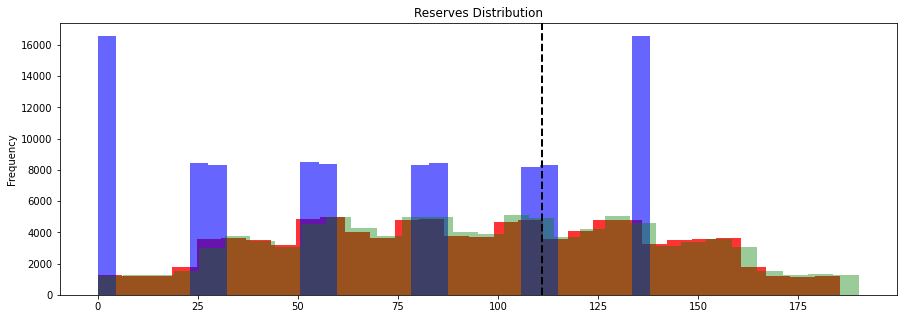

In [38]:
# The black dotted line represents the breakeven reserves amount 

df0['product'].plot(kind='hist', color='r', alpha=0.8, bins=30, figsize=[15,5]) # Flat distribution, long tail 
df1['product'].plot(kind='hist', color='b', alpha=0.6, bins=30, figsize=[15,5]) # Distribution heavy on tails, more uniform
df2['product'].plot(kind='hist', color='g', alpha=0.4, bins=30, figsize=[15,5]) # Flat distribution, long tail 
plt.axvline(111, color='black', linestyle='--', linewidth=2)
plt.title('Reserves Distribution')
plt.show()

**Observations:**
- The breakeven amount of reserves is above the average reserves in all three regions, meaning most wells are unprofitable
- Region 1 seems to have the least amount of profitable wells
    - However it seems to be the most predictable from the model results 
    - Will test it on the test set to see results 
- There's more than enough profitable wells (relative to a 200 well budget), if we are able to accurately ID the top 200 to develop we can be profitable in each region

#### Profit Calculation Functions:

Write a function to calculate profit from a set of selected oil wells and model predictions:

- 4.1. Pick the wells with the highest values of predictions.
- 4.2. Summarize the target volume of reserves in accordance with these predictions
- 4.3. Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

In [39]:
# Random state for subsample iteration

state = np.random.RandomState(12345)

In [40]:
# Pick the best 200 wells in each region:

# Function to rank wells by probability in descending order, then take the top X number of wells 
def profit(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return rev_k_bbl * selected.sum() - dev_cost * count  

# Bootstrapping 1000 wells in subsampels of 500, and choosing the top 200 from each 
#     Will do this with decision tree and random forest prediction sets in all 3 regions
def bootstrap_revs(target, predictions):
    predictions_df = pd.DataFrame(data=predictions, index=target.index, columns=['Predictions'])
    values = []
    for i in range(1000):
        subsample_target = target.sample(n=500, replace=True, random_state=state)
        subsample_predict = predictions_df.loc[subsample_target.index]
        subsample_profit = profit(subsample_target, subsample_predict['Predictions'], 200)
        values.append(subsample_profit)
    values = pd.Series(values)
    return values

# Looking for revenues of less than the $100 million development cost
def loss_ratio(values):
    loss = values.where(values < 0).count()
    loss_ratio = loss / len(values)
    return loss_ratio, loss

# Confidence Interval function:
def confidence_interval(lower, upper, values):
    lower_bound = values.quantile(lower)
    upper_bound = values.quantile(upper)
    return lower_bound, upper_bound

#### Risk and Profit Calculation:

Calculate risks and profit for each region:

- 5.1. Use the bootstrapping technique with 1000 samples to find the distribution of profit.
- 5.2. Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.
- 5.3. Provide findings: suggest a region for development of oil wells and justify the choice.

**Linear Regression:**

In [41]:
# Linear Regression Revenues Region 0 

model0_values = bootstrap_revs(y0_valid, model0_predictions)
model0_lower, model0_upper = confidence_interval(0.025, 0.975, model0_values)
print('Linear Regression, Region 0 Mean ($ Millions):', model0_values.mean() / 1000000)
print('Linear Regression, Region 0 95% CI Lower Bound:', model0_lower / 1000000)
print('Linear Regression, Region 0 95% CI Upper Bound:', model0_upper / 1000000)

Linear Regression, Region 0 Mean ($ Millions): 4.370929928711485
Linear Regression, Region 0 95% CI Lower Bound: -0.8395767825496767
Linear Regression, Region 0 95% CI Upper Bound: 9.239956215731635


In [42]:
# Linear Regression Losses Region 0 
#     This region has higher losses than the 2.5% threshold

y0_loss_ratio, y0_losses = loss_ratio(model0_values)
print('Region 0 Loss Ratio:', y0_loss_ratio)
print('Region 0 Samples with Losses:', y0_losses)

Region 0 Loss Ratio: 0.054
Region 0 Samples with Losses: 54


In [43]:
# Linear Regression Revenues Region 1
#     The 95% confidence interval is within breakeven range (lower bound is above $100 million revenue and is profitable)

model1_values = bootstrap_revs(y1_valid, model1_predictions)
model1_lower, model1_upper = confidence_interval(0.025, 0.975, model1_values)
print('Linear Regression, Region 1 Mean ($ Millions):', model1_values.mean() / 1000000)
print('Linear Regression, Region 1 95% CI Lower Bound:', model1_lower / 1000000)
print('Linear Regression, Region 1 95% CI Upper Bound:', model1_upper / 1000000)

Linear Regression, Region 1 Mean ($ Millions): 4.958852807158779
Linear Regression, Region 1 95% CI Lower Bound: 0.8569361525000961
Linear Regression, Region 1 95% CI Upper Bound: 9.257909966990443


In [44]:
# Linear Regression Losses Region 1
#     This region is under the loss threshold

y1_loss_ratio, y1_losses = loss_ratio(model1_values)
print('Region 1 Loss Ratio:', y1_loss_ratio)
print('Region 1 Samples with Losses:', y1_losses)

Region 1 Loss Ratio: 0.007
Region 1 Samples with Losses: 7


In [45]:
# Linear Regression Revenues Region 2

model2_values = bootstrap_revs(y2_valid, model2_predictions)
model2_lower, model2_upper = confidence_interval(0.025, 0.975, model2_values)
print('Linear Regression, Region 2 Mean ($ Millions):', model2_values.mean() / 1000000)
print('Linear Regression, Region 2 95% CI Lower Bound:', model2_lower / 1000000)
print('Linear Regression, Region 2 95% CI Upper Bound:', model2_upper / 1000000)

Linear Regression, Region 2 Mean ($ Millions): 3.9643203752366722
Linear Regression, Region 2 95% CI Lower Bound: -1.6270476605620185
Linear Regression, Region 2 95% CI Upper Bound: 9.063014857608618


In [46]:
# Linear Regression Losses Region 2
#     This region is also above the 2.5% loss threshold 

y2_loss_ratio, y2_losses = loss_ratio(model2_values)
print('Region 2 Loss Ratio:', y2_loss_ratio)
print('Region 2 Samples with Losses:', y2_losses)

Region 2 Loss Ratio: 0.071
Region 2 Samples with Losses: 71


**Bootstrapping Results for Profit and Risk:**
- Of all the regions, only region 1 is under the 2.5% loss threshold (out of the 1,000 subsamples of 500 wells with the top 200 per the model results chosen), less than 2.5% of them have losses
- The 95% confidence interval is profitable (\\$101 - \\$109 million)
- The average revenue is about the same for all three regions from running this bootstrapping exercise (\\$104 million)
- While region 1 had less wells above the breakeven reserve amount, it was the most predictable with the model, meaning we have better odds of chosing profitable wells in this region

#### Test Set with Selection Region
- Using the Test Set with the selected region (1) 

In [47]:
test_predictions = model1.predict(X1_test)
test_mse = mean_squared_error(y1_test, test_predictions)
test_rmse = test_mse**0.5

print_results(test_rmse, mean1_rmse, test_mse, mean1_mse)
print()
print('Average Predicted Reserves:', test_predictions.mean())

Linear Regression RMSE: 0.8933122318838601
Target Average RMSE: 45.94419317228633
RMSE Ratio: 0.019443419727364124

Linear Regression MSE: 0.7980067436333234
Target Average MSE: 2110.8688862523622
MSE Ratio: 0.00037804657069445225

Average Predicted Reserves: 68.91105409427654


In [48]:
# Linear Regression Revenues Region 1 - Test Set
#     Results are similar to the validation set
#     95% confidence interval sits in profitable territory

test_values = bootstrap_revs(y1_test, test_predictions)
test_lower, test_upper = confidence_interval(0.025, 0.975, test_values)
print('Linear Regression, Region 1 Mean ($ Millions):', test_values.mean() / 1000000)
print('Linear Regression, Region 1 95% CI Lower Bound:', test_lower / 1000000)
print('Linear Regression, Region 1 95% CI Upper Bound:', test_upper / 1000000)

Linear Regression, Region 1 Mean ($ Millions): 4.595106316904298
Linear Regression, Region 1 95% CI Lower Bound: 0.752082783767995
Linear Regression, Region 1 95% CI Upper Bound: 8.780852796690468


### Conclusion
- We choose Region 1 for development, as our model has the best prediction capabilities in that region, meaning we have a higher chance of selecting profitable wells 
- Its distribution of features and product was unique relative to the other 2 regions, so it was either going to be the best or worse region 
- The test set validated the results, showing that the model chose a profitable selection of wells